In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 

warnings.simplefilter("ignore")
df = pd.read_csv("TravelInsurancePrediction.csv")
df.head()


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [2]:
df.isna().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [3]:
df.drop(["Unnamed: 0", "GraduateOrNot"], axis = 1, inplace=True)
df.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,700000,8,1,Yes,No,0


In [4]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


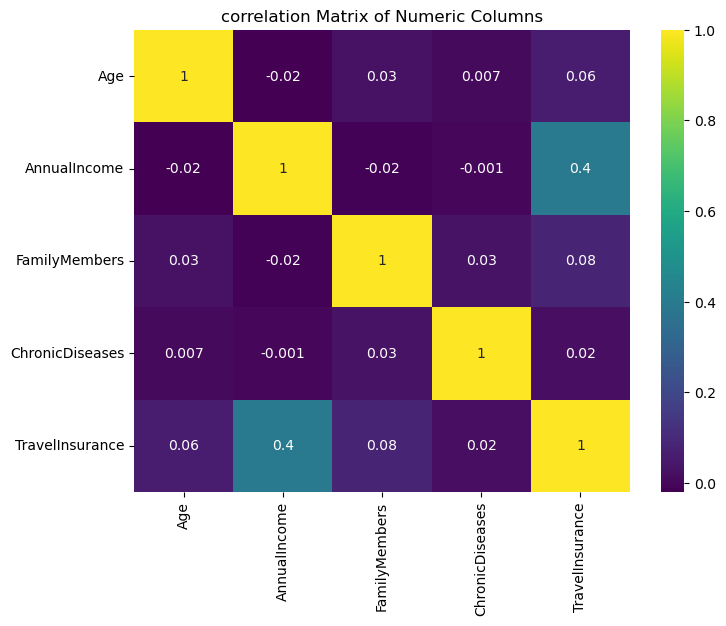

In [5]:
#select only numeric columns for correlation 
numeric_df = df.select_dtypes(include='number')

#plot the correlation heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".1g", cmap="viridis", cbar=True)
plt.title("correlation Matrix of Numeric Columns")
plt.show()

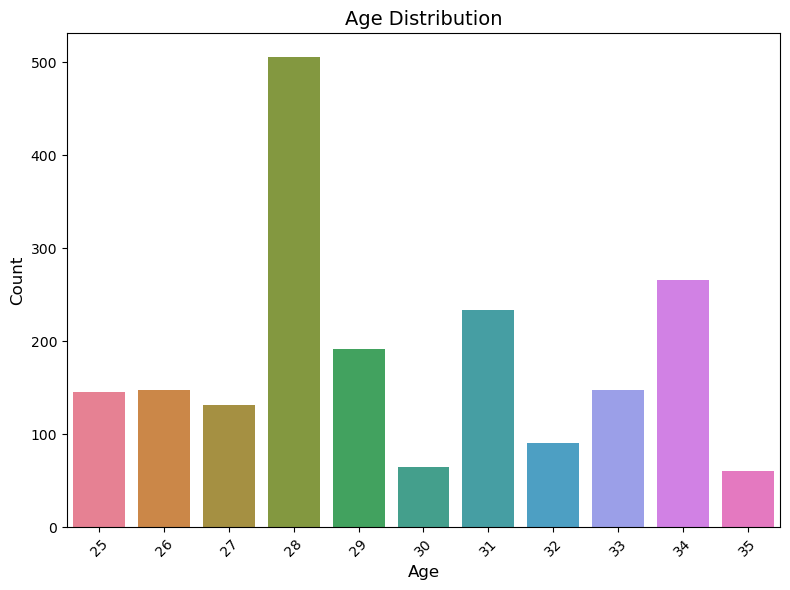

In [6]:
#Generate a unique color for each age value
unique_ages = df["Age"].nunique()
palette = sns.color_palette("husl", unique_ages)

#create the plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Age", data=df, ax=ax, palette=palette, order=sorted(df["Age"].unique()))

#Beautify 
ax.set_title("Age Distribution", fontsize=14)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

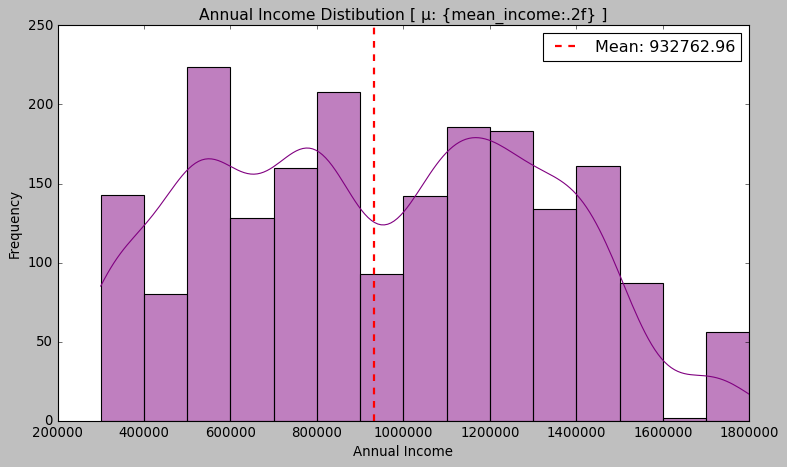

In [7]:
plt.style.use("classic")
#create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df["AnnualIncome"], kde=True, color="purple", ax=ax)

#Beautify
mean_income = df["AnnualIncome"].mean()
ax.axvline(mean_income, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_income:.2f}")
ax.set_title("Annual Income Distibution [ μ: {mean_income:.2f} ]", fontsize=14)
ax.set_xlabel("Annual Income", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

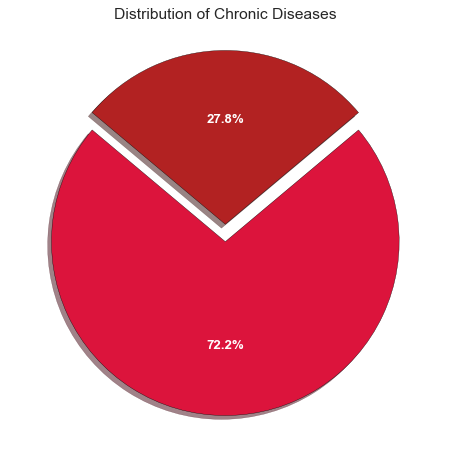

In [8]:
#use a clean and professional style 
plt.style.use("seaborn-v0_8")

#Get value counts  
disease_counts = df["ChronicDiseases"].value_counts()
labels = ["Non-Chronic", "Chronic"]

#Create the plot 
fig, ax = plt.subplots(figsize=(8, 6))
wedgws, texts, autotexts = ax.pie(
    x = disease_counts, 
    labels = labels,
    colors=["Crimson", "firebrick"],
    shadow = True,
    explode=(0, 0.1),
    autopct="%1.1f%%",
    startangle = 140,
    textprops=dict(color="White", fontsize=12),
)

#Beautify
ax.set_title("Distribution of Chronic Diseases", fontsize=14)
plt.setp(autotexts, weight= "bold")
plt.tight_layout()
plt.show()

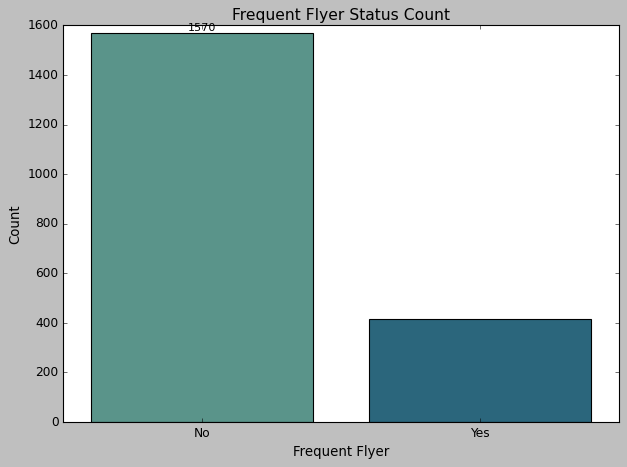

In [9]:



plt.style.use("classic")

#Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x = "FrequentFlyer", data=df, palette="crest", ax=ax)

#Beautify
ax.set_title("Frequent Flyer Status Count", fontsize=14)
ax.set_xlabel("Frequent Flyer", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.bar_label(ax.containers[0], label_type="edge", fontsize=10)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

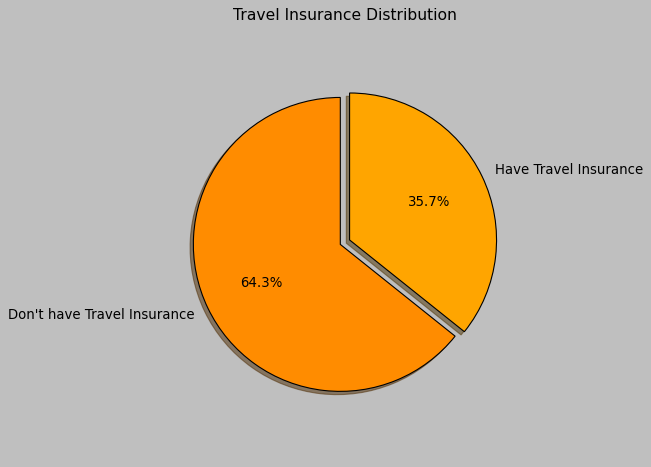

In [10]:
#pie Chart values and labels
values = df["TravelInsurance"].value_counts()
labels = ["Don't have Travel Insurance", "Have Travel Insurance"]

#Create pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(
    x = values,
    labels = labels,
    colors = ["darkorange", "orange"],
    autopct = "%1.1f%%",
    explode = (0, 0.07),
    shadow= True,
    startangle = 90,
    wedgeprops = {"edgecolor": "black"}
)

#Title and Styling
ax.set_title("Travel Insurance Distribution", fontsize = 14)
ax.axis("equal") 

plt.tight_layout()
plt.show()

In [11]:
# yes : 1 , No : 0
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes' : 1, 'No': 0})

#Government Sector : 1, Private Sector/Self Employed : 0
df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})
#Having a look at the dataset after the numerical transformation
df.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,400000,6,1,0,0,0
1,31,0,1250000,7,0,0,0,0
2,34,0,500000,4,1,0,0,1
3,28,0,700000,3,1,0,0,0
4,28,0,700000,8,1,1,0,0


In [12]:
# X data

x = df.drop("TravelInsurance", axis=1)
x.head()

,Age,Employment Type,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,400000,6,1,0,0
1,31,0,1250000,7,0,0,0
2,34,0,500000,4,1,0,0
3,28,0,700000,3,1,0,0
4,28,0,700000,8,1,1,0


In [13]:
# Y data
y = df["TravelInsurance"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [14]:
# Splitting the data into x train, x test and y train, y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train), len(x_test)


(1589, 398)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
RandomForestClassifierScore = rf.score(x_test, y_test) 
RandomForestClassifierScore


0.8090452261306532

In [17]:
print("Accuracy obtained by RandomForestClassifier model:", RandomForestClassifierScore*100)

Accuracy obtained by RandomForestClassifier model: 80.90452261306532


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features' : [2, 3], 
    'min_samples_leaf' : [3, 4, 5],
    'min_samples_split' : [8, 10, 12],
    'n_estimators' : [100, 200, 300, 1000]
}

grid_search_rf = GridSearchCV(estimator = rf,
                              param_grid=param_grid,
                              cv = 3, n_jobs= -1, verbose = 2)

In [21]:
grid_search_rf.fit(x_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [80, 90, 100, 110, 120],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [22]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [23]:

grid_search_rf.best_score_

np.float64(0.8338683406451)

In [24]:
grid_search_rf_predict = grid_search_rf.predict(x_test)

In [25]:
print('Improvement in Random Forest Classifier after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_rf.best_score_- RandomForestClassifierScore) / RandomForestClassifierScore))

Improvement in Random Forest Classifier after GridSearchCV: 3.07%.


In [26]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, grid_search_rf_predict))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       257
           1       0.99      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.90      0.78      0.81       398
weighted avg       0.87      0.84      0.83       398

